# [팬더스(Pandas)](https://pandas.pydata.org/pandas-docs/stable/index.html#)


팬더스(Pandas)라는 이름은 계량경제학의 [PANel DAta](https://en.wikipedia.org/wiki/Panel_data)에서 유래한 이름입니다. 표 형태로 표현될 수 있는 데이터(예: 엑셀, 구글 스프레드시트 등)를 다루기에 편리합니다. 데이터 분석과 조작에 필요한 기능들을 가지고 있고 다양한 형식의 파일 입출력, 데이터베이스 연동, 그래프 그리기 등의 편의 기능들도 다양하게 발달해 있습니다. 엑셀이나 구글 스프레드시트보다 훨씬 빠릅니다. 여기서는 업무 자동화 보다는 프로그래머 관점에서 데이터 사이언스를 살짝 엿보는 수준으로 간단한 사용법들을 알아보겠습니다. 

```conda install pandas``` 또는 ```pip install pandas```로 간단히 설치할 수 있습니다.

### 데이터 프레임(Data Frame)

데이터 사이언스 관점에서 시작하실 때는 [공식 튜토리얼](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html#getting-started)이 데이터 분석 방법 위주로 잘 만들어져 있습니다. 여기서는 더 이해하기 쉬운 방법으로 개념을 정리해보겠습니다.

팬더스에서는 행(row)과 열(column)로 이루어진 구조를 데이터 프레임이라고 부릅니다. 예를 들어서 어떤 모임의 주소록을 생각해봅시다.

|이름|전화번호|이메일|생일|
|---|---|---|---|
|성기훈|8734-2398|gh@squid.kr|1974-10-31|
|아이언맨|1234-5678|tony@avengers.com|1970-5-29|
|Robin|2754-8384|red@dc.net|1996-3-15|

일반적으로 주소록을 만들때는 인원이 추가되거나 삭제 되더라도 어떤 항목들을 기록하는 지는 잘 변하지 않기 때문에 이름, 전화번호, 이메일 같은 특징(feature)들을 하나의 기둥(열, column) 형태로 모아서 기록합니다. 이때 "이름", "전화번호" 등이 각각의 기둥의 이름 역할을 하는 레이블(label)입니다. 새로운 인원이 추가가될 때는 새로운 가로줄(행, row)을 만들어서 기록해주고 반대로 누군가를 삭제할 때는 가로줄 하나를 지웁니다. 기둥의 이름들을 모아놓은 첫 번째 가로줄은 헤더(header row)라고 부릅니다.

만약, 이 모임의 연령대가 대강 어떻게 되는지 분포를 보고 싶다면 생일 기둥에 들어있는 값들을 쭉 훑어보겠지요. 그런 의미에서 하나의 기둥을 여러 값들이 나열되어 있는 시리즈(series)라고 부릅니다. 다시 나오겠지만, 시간에 따른 비트코인 가격 변동 같이 시간에 대한 변화를 볼 때는 시계열(time series)라고 부릅니다.

[참고] 여기서는 '행', '열' 같은 한자 대신 오해를 줄이기 위해 '가로줄(row)', '기둥(column)' 같이 직관적으로 이해가 가능한 용어를 사용하겠습니다. 


### 데이터프레임 만들기

비어있는 데이터프레임을 만들고 기둥을 추가해봅시다.

In [1]:
import pandas as pd

# 비어 있는 데이터프레임 만들기
df = pd.DataFrame()

# 비어있는 기둥(column)들 추가
# dict처럼 key를 이용한 indexing
df["Name"] = []
df["Phone"] = []
df["Email"] = []
df["Birthday"] = []

# df 객체가 dict인 것은 아니고
# 일부 기능이 dict와 유사하게 작동하는 자료형(class ~.DataFrame)을 만든 것
print(type(df))  # <class 'pandas.core.frame.DataFrame'>

# 표를 배열로 생각했을 때 shape
print(df.shape)  # (0, 4) -> column이 4개이기 때문에 4인데 데이터가 하나도 추가가 안되어 있기 때문에 0이다.

df

<class 'pandas.core.frame.DataFrame'>
(0, 4)


,Name,Phone,Email,Birthday


In [4]:
import pandas as pd

df = pd.DataFrame()

# 기둥 단위로 추가
# dict처럼 key를 이용한 indexing
df["Name"] = ["성기훈", "아이언맨", "Robin"]
df["Phone"] = ["8734-2398", "1234-5678", "2754-8384"]
df["Email"] = ["gh@squid.kr", "tony@avengers.com", "red@dc.net"]
df["Birthday"] = ["1974-10-31", "1970-5-29", "1996-3-15"]

print(df.index) #앞에서 배웠던 range랑 비슷하다. start=0, 각 column에 data 3개씩 들어가 있으니 stop=3, index가 1씩 증가
print(df.shape)

df

RangeIndex(start=0, stop=3, step=1)
(3, 4)


,Name,Phone,Email,Birthday
0,성기훈,8734-2398,gh@squid.kr,1974-10-31
1,아이언맨,1234-5678,tony@avengers.com,1970-5-29
2,Robin,2754-8384,red@dc.net,1996-3-15


데이터프레임을 초기화할 때 비어있는 기둥들을 추가할 수도 있습니다.


In [5]:
import pandas as pd

# 처음부터 비어있는 기둥들 추가
df = pd.DataFrame(columns=["Name", "Phone", "Email", "Birthday"])

df

,Name,Phone,Email,Birthday


데이터로 초기화할 수 있습니다.

In [ ]:
import pandas as pd

# Dict로부터 생성
df = pd.DataFrame(
    {
        "Name": ["성기훈", "아이언맨", "Robin"],
        "Phone": ["8734-2398", "1234-5678", "2754-8384"],
        "Email": ["gh@squid.kr", "tony@avengers.com", "red@dc.net"],
        "Birthday": ["1974-10-31", "1970-5-29", "1996-3-15"],
    }
)

df

파일로부터 데이터프레임을 만들 수 있습니다.

In [11]:
import pandas as pd

# CSV 파일을 읽어들여서 만들기(Excel, json 파일 등등 가능)
df = pd.read_csv("샘플주소록.csv") 

# CSV 파일로 저장
# index를 True로 하면 0, 1, 2, ... 로 된 인덱스의 기둥이 하나 더 저장됩니다.
# df.to_csv("샘플주소록.csv", index=False)

# Numpy 배열로 변환
print(df.to_numpy().shape)

# Birthday 기둥을 문자열이 아니라 datetime으로 변환
# df = pd.read_csv("샘플주소록.csv", parse_dates=["Birthday"])

df

(3, 4)


,Name,Phone,Email,Birthday
0,성기훈,8734-2398,gh@squid.kr,1974-10-31
1,아이언맨,1234-5678,tony@avengers.com,1970-5-29
2,Robin,2754-8384,red@dc.net,1996-3-15


### 기초적인 사용법들

많이 사용하는 사용법들을 몇 가지 알아보겠습니다.

[참고] 설명의 편의를 위해 먼저 실행한 셀의 결과를 계속 활용합니다.  

In [12]:
import pandas as pd

df = pd.read_csv("샘플주소록.csv")

# 데이터가 많은 경우에는 매번 전부를 확인할 수 없습니다.
# 처음 몇 개를 볼 때 사용
print(df.head(2))

# 마지막 몇 개만 보고 싶을 때 사용
print(df.tail(1))

# 데이터프레임의 정보를 보고 싶을 때
print(df.info())

# 각 기둥의 자료형만 보고 싶을 때
print(df.dtypes)

   Name      Phone              Email    Birthday
0   성기훈  8734-2398        gh@squid.kr  1974-10-31
1  아이언맨  1234-5678  tony@avengers.com   1970-5-29
    Name      Phone       Email   Birthday
2  Robin  2754-8384  red@dc.net  1996-3-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      3 non-null      object
 1   Phone     3 non-null      object
 2   Email     3 non-null      object
 3   Birthday  3 non-null      object
dtypes: object(4)
memory usage: 224.0+ bytes
None
Name        object
Phone       object
Email       object
Birthday    object
dtype: object


In [13]:
# 기둥의 이름으로 한 기둥만 골라서 시리즈(series) 생성
# 즉, 기둥 하나만 선택

birthday_series = df["Birthday"]

print(type(birthday_series))

birthday_series

<class 'pandas.core.series.Series'>


0    1974-10-31
1     1970-5-29
2     1996-3-15
Name: Birthday, dtype: object

In [14]:
# 날짜를 datetime으로 바꾸기
df["Birthday"] = pd.to_datetime(df["Birthday"]) 

# 읽어들이면서 datetime을 분석(parse)할 수도 있습니다.
# df = pd.read_csv("샘플주소록.csv", parse_dates=["Birthday"]])

# dtype이 datetime64
df["Birthday"]

0   1974-10-31
1   1970-05-29
2   1996-03-15
Name: Birthday, dtype: datetime64[ns]

In [15]:
# 생일을 나이로 바꾸기

from datetime import date

today = date.today()

df["Age"] = today.year - df["Birthday"].dt.year + 1

df

,Name,Phone,Email,Birthday,Age
0,성기훈,8734-2398,gh@squid.kr,1974-10-31,51
1,아이언맨,1234-5678,tony@avengers.com,1970-05-29,55
2,Robin,2754-8384,red@dc.net,1996-03-15,29


In [16]:
# Age는 int64
print(df.info())

# 기초적인 통계자료 출력
print(df["Age"].describe())
# df["Age"].mean() 등으로 직접 계산 가능

# 문자열 데이터도 str처럼 조작 가능
print(df["Email"].str.upper())

# 가로줄(row)들의 index 범위
print(df.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      3 non-null      object        
 1   Phone     3 non-null      object        
 2   Email     3 non-null      object        
 3   Birthday  3 non-null      datetime64[ns]
 4   Age       3 non-null      int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 236.0+ bytes
None
count     3.0
mean     45.0
std      14.0
min      29.0
25%      40.0
50%      51.0
75%      53.0
max      55.0
Name: Age, dtype: float64
0          GH@SQUID.KR
1    TONY@AVENGERS.COM
2           RED@DC.NET
Name: Email, dtype: object
RangeIndex(start=0, stop=3, step=1)


In [17]:
# Select a subset of a DataFrame by position.
# 가로줄을 시리즈로 반환
df.iloc[0]

# print(type(df.iloc[0])) # <class 'pandas.core.series.Series'>

# [주의]
# iloc은 함수나 메써드가 아니라 property라는 특별한 변수입니다.
# 괄호가 아니라 대괄호를 사용합니다.

Name                        성기훈
Phone                 8734-2398
Email               gh@squid.kr
Birthday    1974-10-31 00:00:00
Age                          51
Name: 0, dtype: object

In [ ]:
# 가로줄과 기둥을 모두 지정해주면 개별 값(value)을 반환
df.iloc[1, 2]  # 'tony@avengers.com'

# print(df.iloc[1, 2]) # <class 'str'>

In [19]:
# 슬라이싱 가능
df.iloc[1, 0:2]

Name          아이언맨
Phone    1234-5678
Name: 1, dtype: object

In [22]:
# Select a subset of a DataFrame by label.
print(df)
#맨 왼쪽에 0, 1, 2 정수 레이블이 있기 때문에 0으로 행을 선택
df.loc[0, "Name"]

    Name      Phone              Email   Birthday  Age
0    성기훈  8734-2398        gh@squid.kr 1974-10-31   51
1   아이언맨  1234-5678  tony@avengers.com 1970-05-29   55
2  Robin  2754-8384         red@dc.net 1996-03-15   29


'성기훈'

In [23]:
# 조건으로 표의 일부를 선택 가능
df.loc[df["Age"] > 30]

,Name,Phone,Email,Birthday,Age
0,성기훈,8734-2398,gh@squid.kr,1974-10-31,51
1,아이언맨,1234-5678,tony@avengers.com,1970-05-29,55


In [24]:
boolean_series = df["Age"] > 30
print(type(boolean_series))  # <class 'pandas.core.series.Series'>
print(boolean_series)

df.loc[boolean_series, "Name"]

# df.loc[df["Age"] > 30, "Name"] # 조건을 직접 넣어주는 것과 동일

<class 'pandas.core.series.Series'>
0     True
1     True
2    False
Name: Age, dtype: bool


0     성기훈
1    아이언맨
Name: Name, dtype: object

### 가로줄 추가/삭제



In [25]:
# 새로운 가로줄 추가
df.loc[df.index.max() + 1] = {
    "Name": "문나이트",
    "Phone": "1234-1234",
    "Email": "mk@dc.net",
    "Birthday": "1981-02-26",
}
# 또는 df.loc[len(df.index)] = {...}
# Age는 지정을 안했으니 NaN으로 나옴.
df

,Name,Phone,Email,Birthday,Age
0,성기훈,8734-2398,gh@squid.kr,1974-10-31 00:00:00,51.0
1,아이언맨,1234-5678,tony@avengers.com,1970-05-29 00:00:00,55.0
2,Robin,2754-8384,red@dc.net,1996-03-15 00:00:00,29.0
3,문나이트,1234-1234,mk@dc.net,1981-02-26,NaN


In [26]:
# 조건으로 가로줄 삭제
# [주의] df.index를 이용해서 조건식으로 삭제할 가로줄들의 인덱스의 배열을 만듦

print(type(df.index[df["Name"] == "Robin"]))
print(df.index[df["Name"] == "Robin"])

df = df.drop(df.index[df["Name"] == "Robin"], axis=0)

df

<class 'pandas.core.indexes.base.Index'>
Index([2], dtype='int64')


,Name,Phone,Email,Birthday,Age
0,성기훈,8734-2398,gh@squid.kr,1974-10-31 00:00:00,51.0
1,아이언맨,1234-5678,tony@avengers.com,1970-05-29 00:00:00,55.0
3,문나이트,1234-1234,mk@dc.net,1981-02-26,NaN


In [27]:
# 인덱스로 가로줄 삭제
df = df.drop(1, axis=0)

# 인덱스에서 1이 사라졌습니다.

df

,Name,Phone,Email,Birthday,Age
0,성기훈,8734-2398,gh@squid.kr,1974-10-31 00:00:00,51.0
3,문나이트,1234-1234,mk@dc.net,1981-02-26,NaN


In [28]:
# 위의 삭제 코드로, 0, 3 인덱스만 남아있다. 가로줄들의 인덱스를 다시 정리하고 싶다면
# inplace를 true로 하면 df의 수정본을 다른변수를 통해 참조할 필요없이 df 내부에서 수정된다.
df.reset_index(drop=True, inplace=True)
# df = df.reset_index(drop=True)

df

,Name,Phone,Email,Birthday,Age
0,성기훈,8734-2398,gh@squid.kr,1974-10-31 00:00:00,51.0
1,문나이트,1234-1234,mk@dc.net,1981-02-26,NaN


In [ ]:
# 세로줄(기둥) 삭제
df = df.drop("Age", axis=1)

df

### 그래프 그리기

<Axes: >

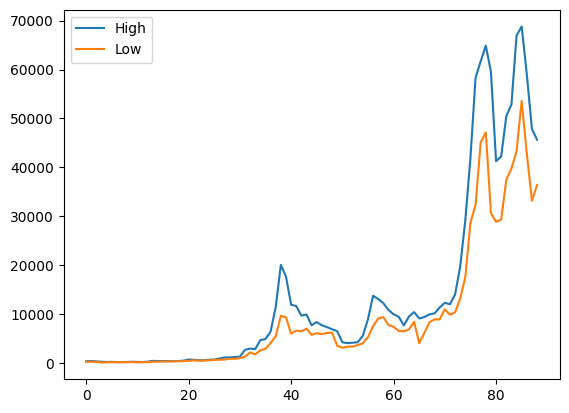

In [29]:
# pandas는 내부적으로 이미 pyplot을 사용하고 있기 때문에, 간단하게 그래프를 그릴 수 있다.
# 데이터 프레임의 plot() 사용

import pandas as pd

df = pd.read_csv("BTC-USD.csv", parse_dates=["Date"])

df[["High", "Low"]].plot()

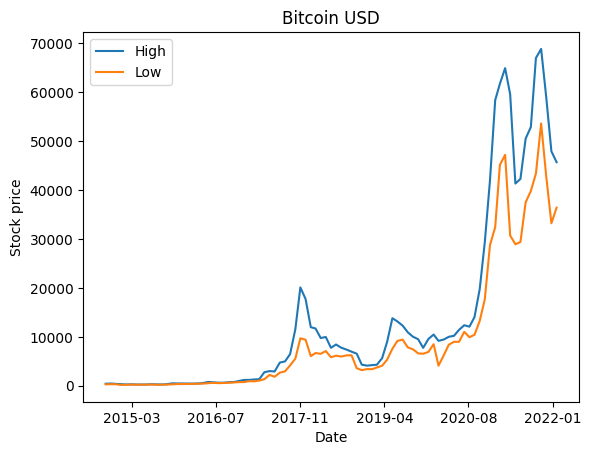

In [30]:
# matplotlib 사용

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots()

ax.plot(df["Date"], df["High"], label="High")
ax.plot(df["Date"], df["Low"], label="Low")

ax.set_xlabel("Date")
ax.set_ylabel("Stock price")
ax.set_title("Bitcoin USD")
ax.legend()

ax.xaxis.set_major_locator(MultipleLocator(500))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

### [실습] 타이태닉(Titanic) 데이터셋(dataset)

타이태닉 데이터셋은 [여기](https://github.com/pandas-dev/pandas/blob/main/doc/data/titanic.csv)에서 받으실 수 있습니다.

1. 탑승자 중 [로테스 백작부인](https://en.wikipedia.org/wiki/No%C3%ABl_Leslie,_Countess_of_Rothes#:~:text=Lucy%20No%C3%ABl%20Martha%20Leslie%2C%20Countess,of%20the%20rescue%20ship%20Carpathia.)을 찾아서 그 당시 나이("Age")를 확인해보세요. 이름에 "Countess"가 포함(contains)되어 있는지를 보면 됩니다.
2. 생존자와 사망자의 수를 각각 확인해보세요.
3. 생존자들의 나이로 히스토그램을 그려보세요.

In [ ]:
import pandas as pd


wide format 이다.

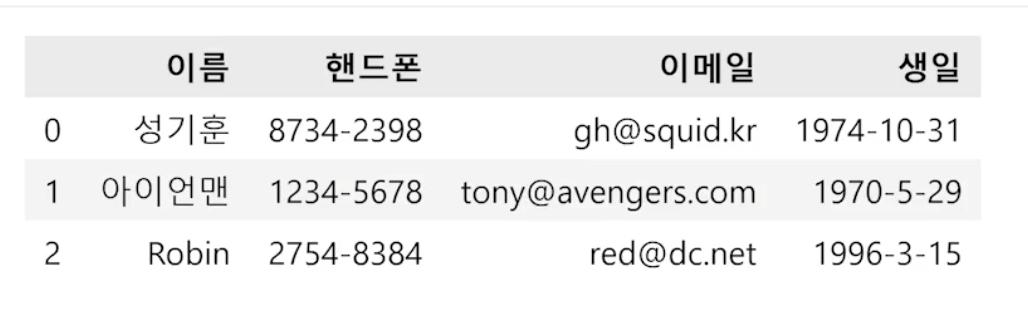

long format 이다. 항목 column에 핸드폰, 이메일, 생일과 같이 여러개의 분류가 있다.

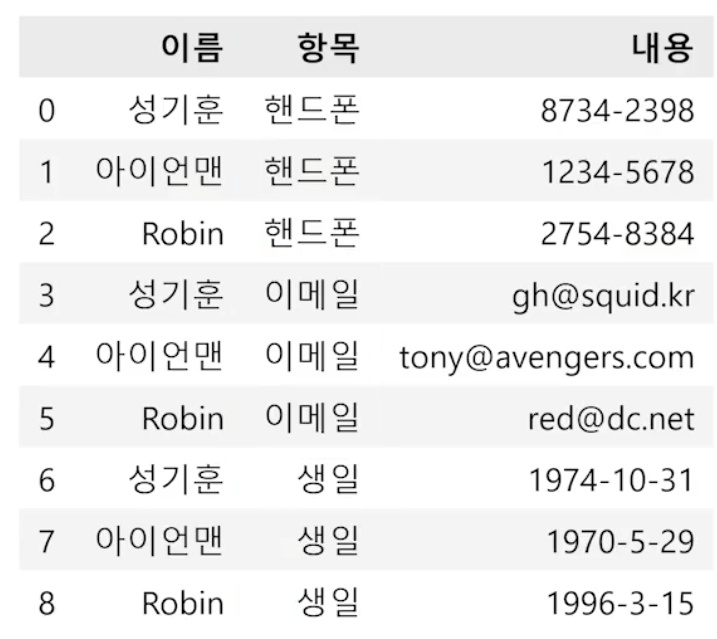

In [31]:
import pandas as pd

df_wide = pd.DataFrame(
    {
        "이름": ["성기훈", "아이언맨", "Robin"],
        "핸드폰": ["8734-2398", "1234-5678", "2754-8384"],
        "이메일": ["gh@squid.kr", "tony@avengers.com", "red@dc.net"],
        "생일": ["1974-10-31", "1970-5-29", "1996-3-15"],
    }
)

df_wide

,이름,핸드폰,이메일,생일
0,성기훈,8734-2398,gh@squid.kr,1974-10-31
1,아이언맨,1234-5678,tony@avengers.com,1970-5-29
2,Robin,2754-8384,red@dc.net,1996-3-15


In [32]:
# wide -> long
df_long = df_wide.melt(
    id_vars="이름",
    var_name="항목", 
    value_vars=["핸드폰", "이메일", "생일"], 
    value_name="내용"
)
df_long

,이름,항목,내용
0,성기훈,핸드폰,8734-2398
1,아이언맨,핸드폰,1234-5678
2,Robin,핸드폰,2754-8384
3,성기훈,이메일,gh@squid.kr
4,아이언맨,이메일,tony@avengers.com
5,Robin,이메일,red@dc.net
6,성기훈,생일,1974-10-31
7,아이언맨,생일,1970-5-29
8,Robin,생일,1996-3-15


In [33]:
# long -> wide
df_wide2 = df_long.pivot(index="이름", columns="항목", values="내용")
df_wide2
# but, 항목과 이름이 겹쳐있음

항목,생일,이메일,핸드폰
이름,,,
Robin,1996-3-15,red@dc.net,2754-8384
성기훈,1974-10-31,gh@squid.kr,8734-2398
아이언맨,1970-5-29,tony@avengers.com,1234-5678


In [34]:
# melt 후 pivot을 했기 때문에 생겨난 "항목" 이라는 label이 사라짐
df_wide2 = df_wide2.reset_index().rename_axis(None, axis=1)
df_wide2

,이름,생일,이메일,핸드폰
0,Robin,1996-3-15,red@dc.net,2754-8384
1,성기훈,1974-10-31,gh@squid.kr,8734-2398
2,아이언맨,1970-5-29,tony@avengers.com,1234-5678


In [35]:
df_wide2 = df_wide2.sort_values("생일", ascending=False)
df_wide2

,이름,생일,이메일,핸드폰
0,Robin,1996-3-15,red@dc.net,2754-8384
1,성기훈,1974-10-31,gh@squid.kr,8734-2398
2,아이언맨,1970-5-29,tony@avengers.com,1234-5678


### [실습] 공기 오염 데이터셋

[파리(Paris), 런던(London), 앤트워프(Antwerpen)의 대기중 이산화질소($NO_2$)의 농도 데이터](https://github.com/pandas-dev/pandas/blob/main/doc/data/air_quality_no2_long.csv)를 가시화해봅시다.


In [ ]:
import pandas as pd

